<a href="https://colab.research.google.com/github/arkadeepsadhukhan-sketch/arkaD-ARIMA/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.26.4
!pip install pmdarima==2.0.4

In [ ]:
import pandas as pd
df=pd.read_csv('/content/TATAMOTORS.csv',index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (251, 5)


/tmp/ipython-input-3312310180.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv('/content/TATAMOTORS.csv',index_col='Date'   ,parse_dates=True)


,Open,High,Low,Last,Close
Date,,,,,
2020-04-30,85.95,93.75,85.95,93.75,93.25
2020-05-04,87.00,87.20,81.50,84.05,83.90
2020-05-05,86.00,86.80,80.40,81.00,80.90
2020-05-06,81.55,83.95,80.35,83.70,83.20
2020-05-07,82.90,84.65,82.10,82.55,82.50
...,...,...,...,...,...
2021-04-26,297.00,299.00,294.60,295.85,295.40
2021-04-27,295.70,302.50,295.10,302.10,301.50
2021-04-28,303.50,309.50,303.00,305.15,305.90


<Axes: xlabel='Date'>

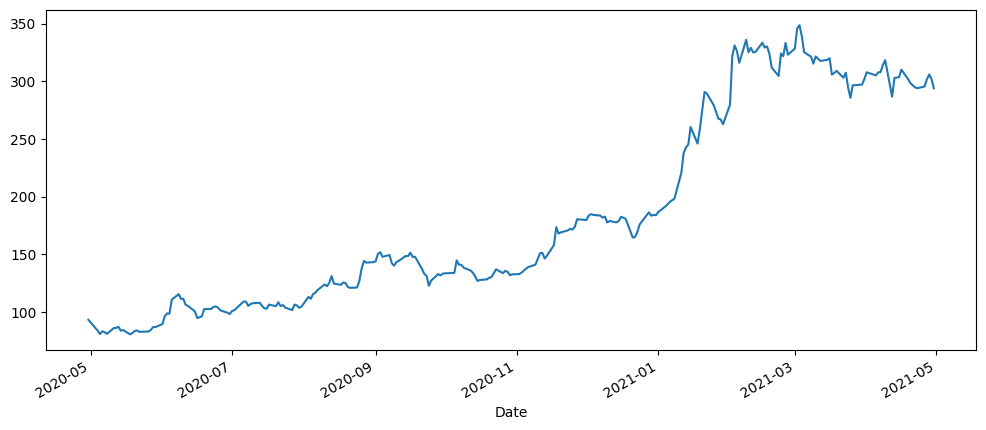

In [ ]:
df['Close'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['Close'])

1. ADF :  -0.848517870382646
2. P-Value :  0.8044534190310029
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression: 239
5. Critical Values :
	 1% :  -3.458010773719797
	 5% :  -2.8737103617125186
	 10% :  -2.5732559963936206


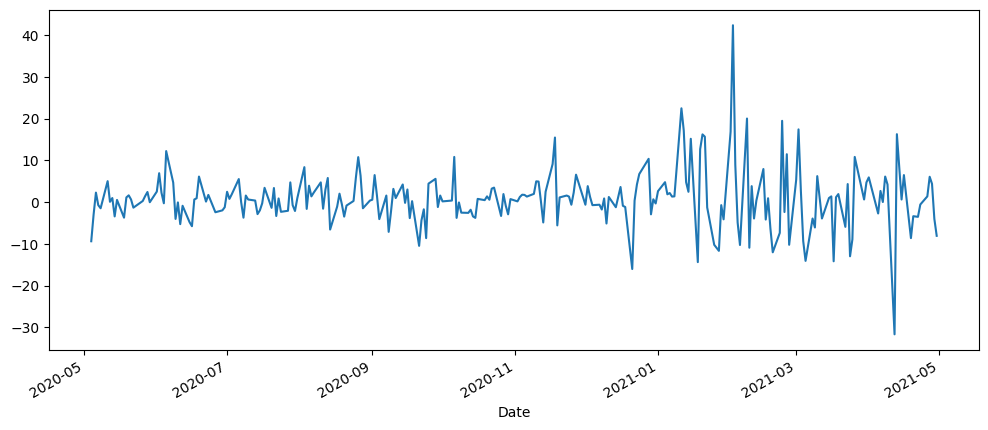

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_differenced_series(series):
    ds = series.diff().dropna()
    ds.plot(figsize=(12,5))
    return ds

d1=plot_differenced_series(df['Close'])

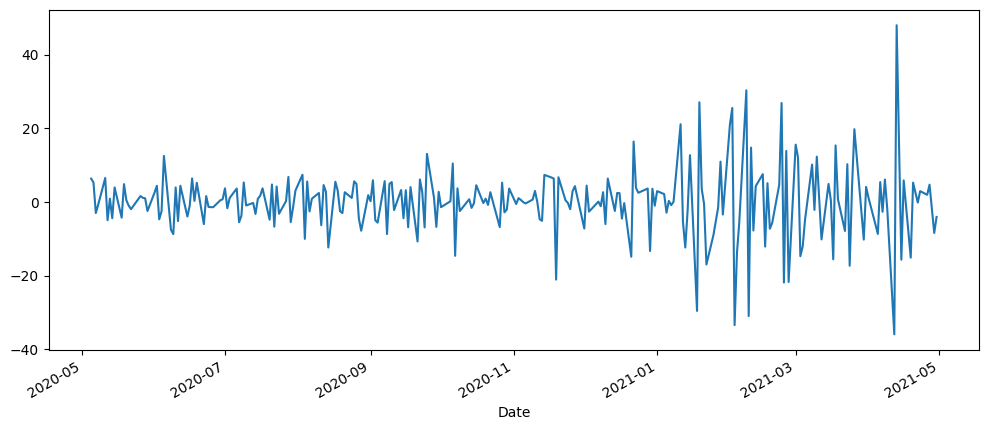

In [ ]:
d2=plot_differenced_series(d1)

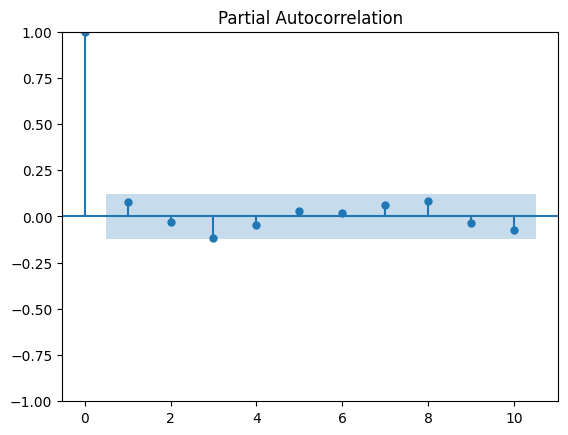

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(d1, lags=10)
plt.show()

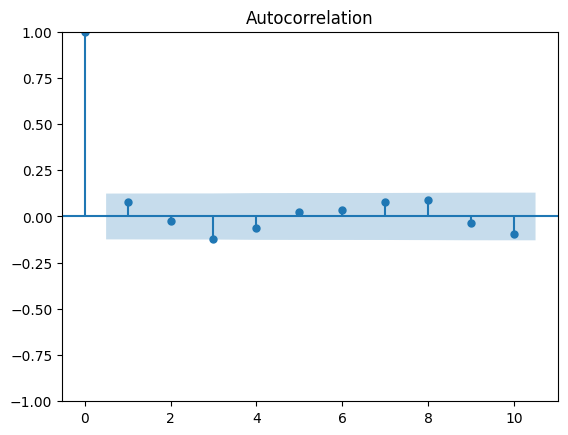

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(d1, lags=10)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(d1)
p_value = adf_result[1]

print(f"P-value: {p_value}")


P-value: 0.00471130619397578


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1675.258, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1674.556, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1675.077, Time=0.06 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1675.019, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1675.977, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1677.016, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.941 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print(df.shape)
train=df.iloc[:-10]
test=df.iloc[-10:]
print(train.shape,test.shape)

(251, 5)
(241, 5) (10, 5)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(3,1,3))
model=model.fit()
model.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  241
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -799.441
Date:                Wed, 27 Aug 2025   AIC                           1612.883
Time:                        20:15:51   BIC                           1637.247
Sample:                             0   HQIC                          1622.700
                                - 241                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4712      0.066     -7.123      0.000      -0.601      -0.342
ar.L2         -0.5290      0.056     -9.437      0.000      -0.639      -0.419
ar.L3         -0.7986      0.075    -10.662      0.000      -0.945      -0.652
ma.L1          0.5734      0.043     13.340      0.000       0.489       0.658
ma.L2          0.6078      0.032     19.168      0.000       0.546       0.670
ma.L3          0.9368      0.048     19.538      0.000       0.843       1.031
sigma2        45.6206      2.458     18.556      0.000      40.802      50.439
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               320.93
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               9.10   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)+1
end=len(train)+len(test)
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)

242    308.716789
243    304.249599
244    303.545791
245    302.219471
246    306.784256
247    305.897058
248    304.959401
249    302.225146
250    304.718084
251    305.738726
Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

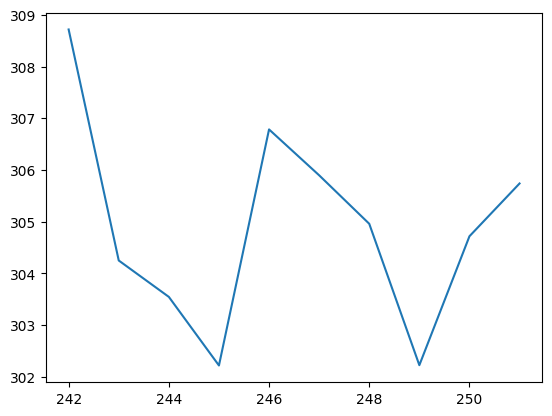

In [ ]:
pred.plot()


<Axes: xlabel='Date'>

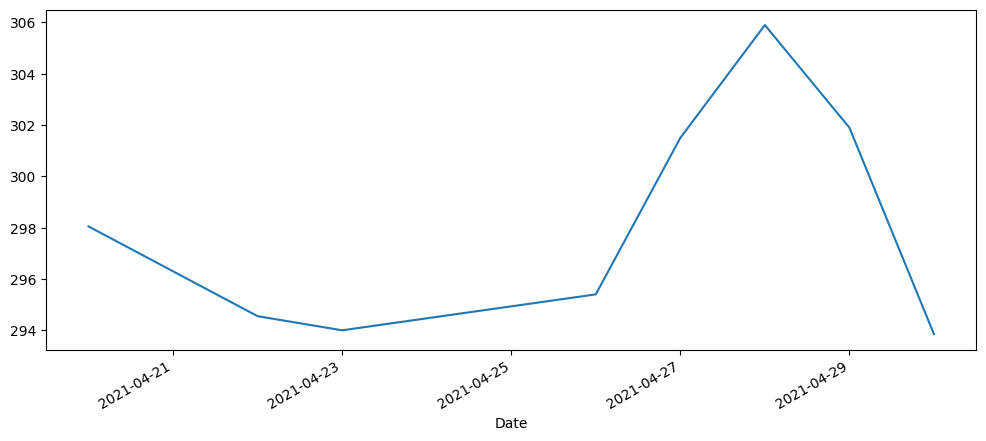

In [ ]:
df[243:251]['Close'].plot(figsize=(12,5))